نور الرحمن ماهر عبد الرحمن (X1667)

محمد احمد عبد الوهاب محمد (X1925)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os as os

# Data Reading and Exploration

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv')

In [ ]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


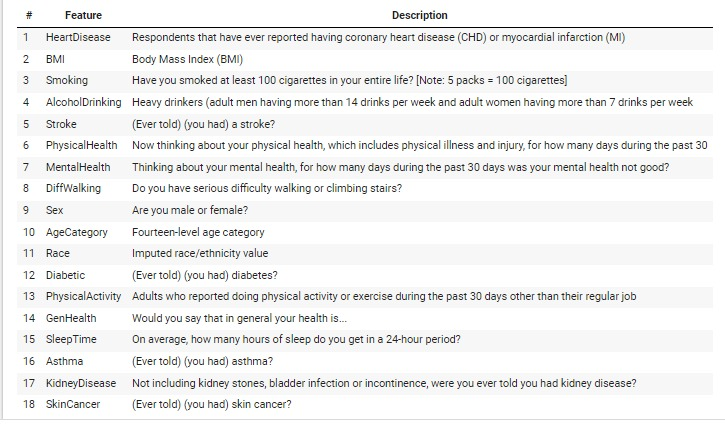

In [ ]:
class DataAnalyzer:
    def __init__(self, dataframe):
        self.df = dataframe

    def info(self):
        print(f"Observations: {self.df.shape[0]}")
        print(f"Variables: {self.df.shape[1]}")

    def print_cols(self):
        for col in self.df.columns:
            print(col)
            
    def value_counts(self):
        for col in self.df.columns:
            print(f"\n###########################################################################################\nThe values of {col} is : \n{self.df[col].value_counts().sort_index()}\n###########################################################################################")
    
    def grab_col_names(self, cat_th=13, car_th=20):
        cat_cols= [col for col in self.df.columns if str(self.df[col].dtypes) in ["category","object", "bool"]]
        num_but_cat=[col for col in self.df.columns if self.df[col].nunique()<10 and self.df[col].dtypes in ["int", "float"]]
        cat_but_car= [col for col in self.df.columns if
                       self.df[col].nunique()>20 and str(self.df[col].dtypes) in ["category", "object"]]
        cat_cols= cat_cols+num_but_cat
        cat_cols = [col for col in cat_cols if col not in cat_but_car]

        num_cols= [col for col in self.df.columns if self.df[col].dtypes in ["int", "float"]]
        num_cols= [col for col in num_cols if col not in cat_cols]

        print(f"Observations: {self.df.shape[0]}")
        print(f"Variables: {self.df.shape[1]}")
        print(f"cat_cols: {len(cat_cols)}")
        print(f"num_cols: {len(num_cols)}")
        print(f"cat_but_car: {len(cat_but_car)}")
        print(f"num_but_cat: {len(num_but_cat)}")

        return cat_cols, num_cols, cat_but_car, num_but_cat


In [ ]:
checker = DataAnalyzer(df)

In [ ]:
checker.info()

Observations: 319795
Variables: 18


In [ ]:
checker.print_cols()

HeartDisease
BMI
Smoking
AlcoholDrinking
Stroke
PhysicalHealth
MentalHealth
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
SleepTime
Asthma
KidneyDisease
SkinCancer


In [ ]:
checker.value_counts()


###########################################################################################
The values of HeartDisease is : 
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
###########################################################################################

###########################################################################################
The values of BMI is : 
12.02    2
12.08    1
12.13    1
12.16    1
12.20    1
        ..
92.53    1
93.86    1
93.97    1
94.66    1
94.85    1
Name: BMI, Length: 3604, dtype: int64
###########################################################################################

###########################################################################################
The values of Smoking is : 
No     187887
Yes    131908
Name: Smoking, dtype: int64
###########################################################################################

###################################################################################

==> There are 17 variables in the dataset. All the variables are of categorical and numerical data type.

==> Class "HeartDisease" is the target variable.

In [ ]:
checker.grab_col_names()

Observations: 319795
Variables: 18
cat_cols: 14
num_cols: 4
cat_but_car: 0
num_but_cat: 0


(['HeartDisease',
  'Smoking',
  'AlcoholDrinking',
  'Stroke',
  'DiffWalking',
  'Sex',
  'AgeCategory',
  'Race',
  'Diabetic',
  'PhysicalActivity',
  'GenHealth',
  'Asthma',
  'KidneyDisease',
  'SkinCancer'],
 ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'],
 [],
 [])

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
def check_df(dataframe, head=5):
    print("############    Shape   ############")
    print(dataframe.shape)
    print("############   dataTypes   ############")
    print(dataframe.dtypes)
    print("############     NullValues     ############")
    print(dataframe.isnull().sum())
    print("############  Mean,Std and Quartiles   ############")
    print(dataframe.describe())

check_df(df)

############    Shape   ############
(319795, 18)
############   dataTypes   ############
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object
############     NullValues     ############
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma           

In [ ]:
df.groupby("HeartDisease")['Sex'].value_counts(normalize=True)*100

HeartDisease  Sex   
No            Female    53.542825
              Male      46.457175
Yes           Male      58.959559
              Female    41.040441
Name: Sex, dtype: float64

In [ ]:
df.groupby("Smoking")['Sex'].value_counts(normalize=True)*100

Smoking  Sex   
No       Female    56.031551
         Male      43.968449
Yes      Male      52.596507
         Female    47.403493
Name: Sex, dtype: float64

In [ ]:
df.groupby("AlcoholDrinking")['Sex'].value_counts(normalize=True)*100

AlcoholDrinking  Sex   
No               Female    52.529377
                 Male      47.470623
Yes              Female    51.696744
                 Male      48.303256
Name: Sex, dtype: float64

In [ ]:
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

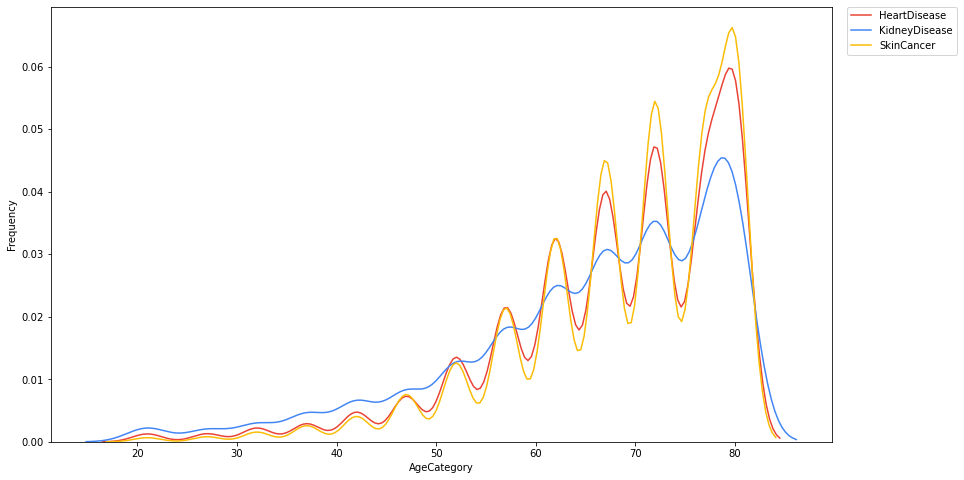

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))

sns.kdeplot(df[df["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(df[df["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

==> People found to have heart disease, skin cancer & kidney disease are mostly old people

<AxesSubplot:xlabel='Sex', ylabel='Frequency'>

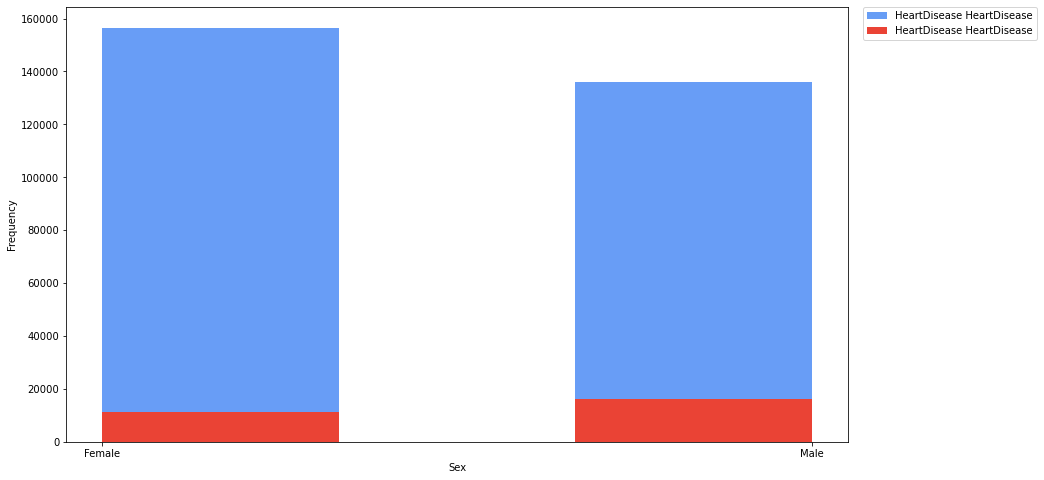

In [ ]:
def plot_histogram(df, x, heart_disease,b1,b2,a1,a2):
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.hist(df[df["HeartDisease"]=="No"][x], bins=b1, alpha=a1, color="#4285f4", label=f"{heart_disease} HeartDisease")
    ax.hist(df[df["HeartDisease"]=="Yes"][x], bins=b2, alpha=a2, color="#ea4335", label=f"{heart_disease} HeartDisease")
    ax.set_xlabel(x)
    ax.set_ylabel("Frequency")
    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    return ax
plot_histogram(df, "Sex", "HeartDisease",3,3,0.8,1)

In [ ]:
selected_rows = [row["Sex"] for i, row in df.iterrows() if row["HeartDisease"] == "Yes"]
print ([ [l, selected_rows.count(l)] for l in set(selected_rows)])

[['Female', 11234], ['Male', 16139]]


In [ ]:
selected_rows = [row["Sex"] for i, row in df.iterrows() if row["HeartDisease"] == "No"]
print ([ [l, selected_rows.count(l)] for l in set(selected_rows)])

[['Female', 156571], ['Male', 135851]]


In [ ]:
female_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Female')])
num_female = len(df[df['Sex']=='Female'])
male_with_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Sex']=='Male')])
num_male = len(df[df['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


==> Most heart disease patients are Male than Females

==> More Females were tested than males

==> Males are approximately 1.6 times more likely to have heart disease than females

<AxesSubplot:xlabel='Smoking', ylabel='Frequency'>

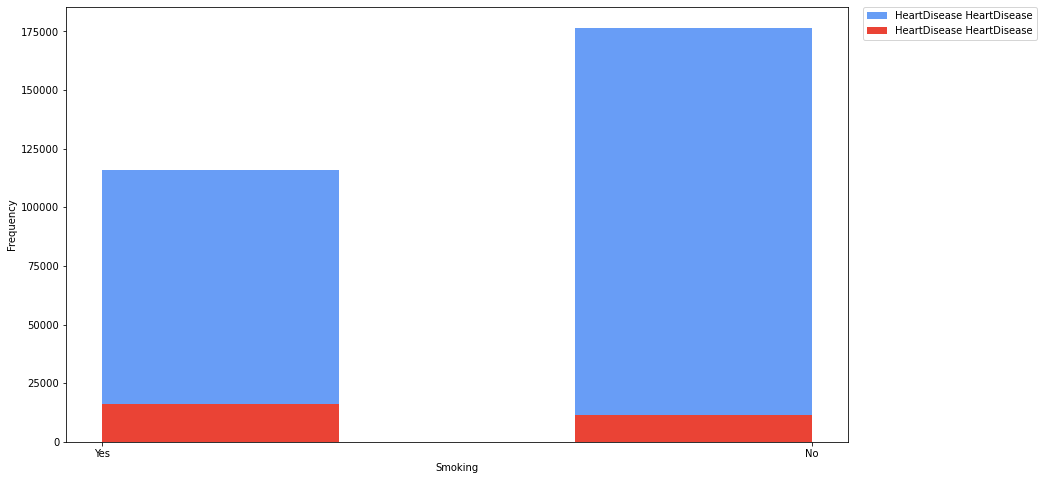

In [ ]:
plot_histogram(df, "Smoking", "HeartDisease",3,3,0.8,1)

In [ ]:
smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='Yes')])
num_smoke = len(df[df['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='No')])
num_no_smoke = len(df[df['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


==> Most heart disease patients smoke

==> People who smoke are approximately twice as likely to have heart disease than people who don't smoke

<AxesSubplot:xlabel='Race', ylabel='Frequency'>

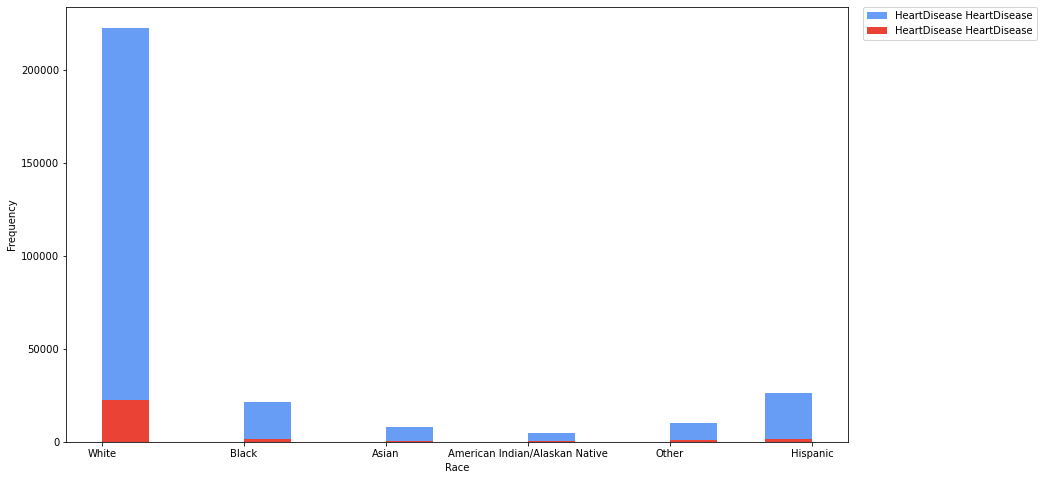

In [ ]:
plot_histogram(df, "Race", "HeartDisease",15,15,0.8,1)

==> Most Heart Disease Patients are White people

<AxesSubplot:xlabel='GenHealth', ylabel='Frequency'>

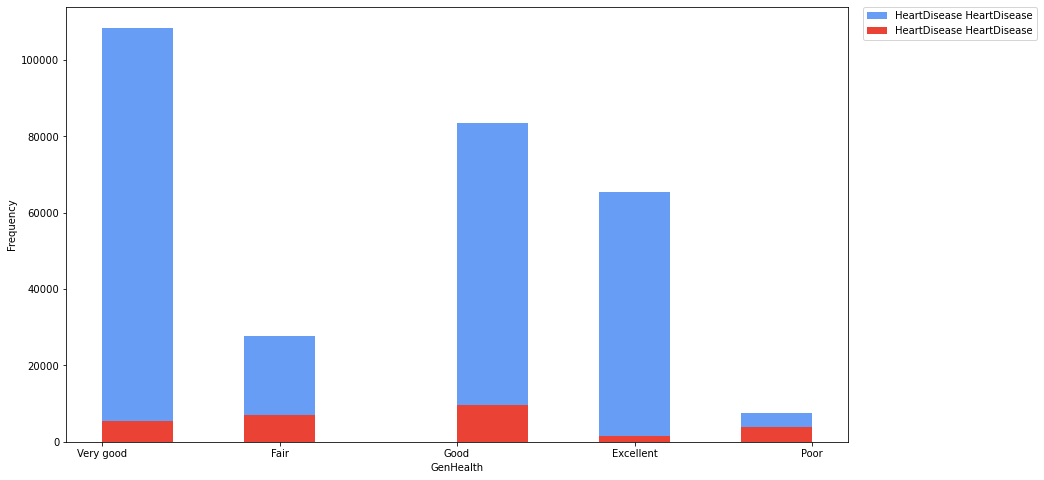

In [ ]:
plot_histogram(df, "GenHealth", "HeartDisease",10,10,0.8,1)

==> Most of poor general health have heart disease

<AxesSubplot:ylabel='HeartDisease'>

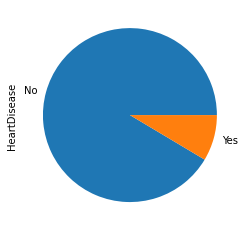

In [ ]:
df["HeartDisease"].value_counts().plot.pie()

In [ ]:
# classification of BMI (Body Mass Index) by ranges :
BMI_UnderWeight = df['BMI'][(df['BMI']>=0) & (df['BMI'] <= 18.5)]
BMI_NormalRange = df['BMI'][(df['BMI']>18.5) & (df['BMI'] <= 25)]
BMI_OverrWeight = df['BMI'][(df['BMI']>25) & (df['BMI'] <= 30)]
BMI_Obese = df['BMI'][(df['BMI']>30)]

In [ ]:
BMI_X = ['UnderWeight','NormalRange','OverWeight','Obese']
BMI_Y = [len(BMI_UnderWeight.values),len(BMI_NormalRange.values),len(BMI_OverrWeight.values),len(BMI_Obese.values)]

<AxesSubplot:>

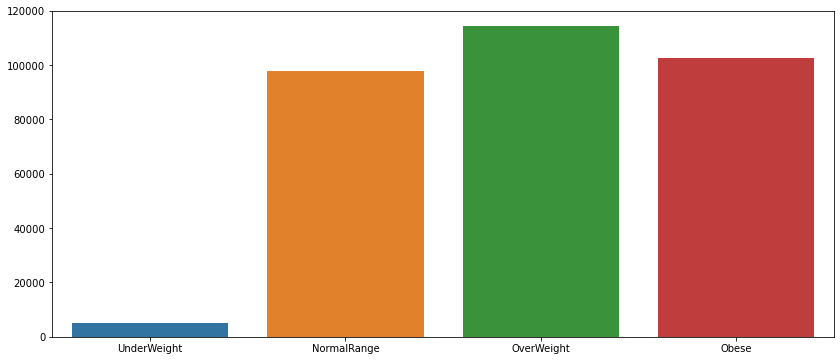

In [ ]:
plt.figure(figsize = (14,6))
sns.barplot (x = BMI_X, y = BMI_Y)

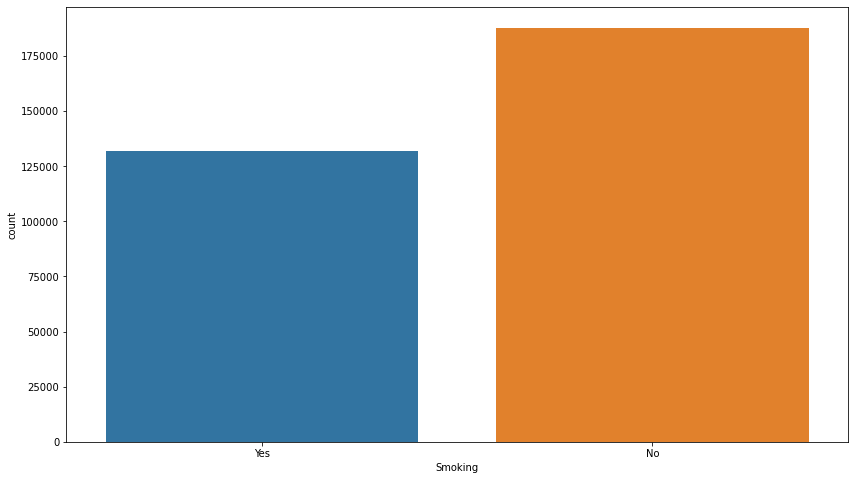

In [ ]:
def plot_countplot(data, x):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=data, x=x)
plot_countplot(df,"Smoking")

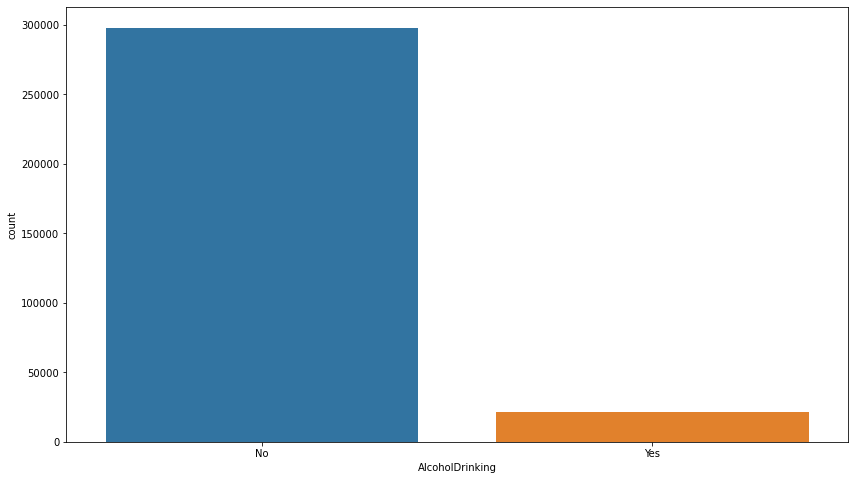

In [ ]:
plot_countplot(df,"AlcoholDrinking")

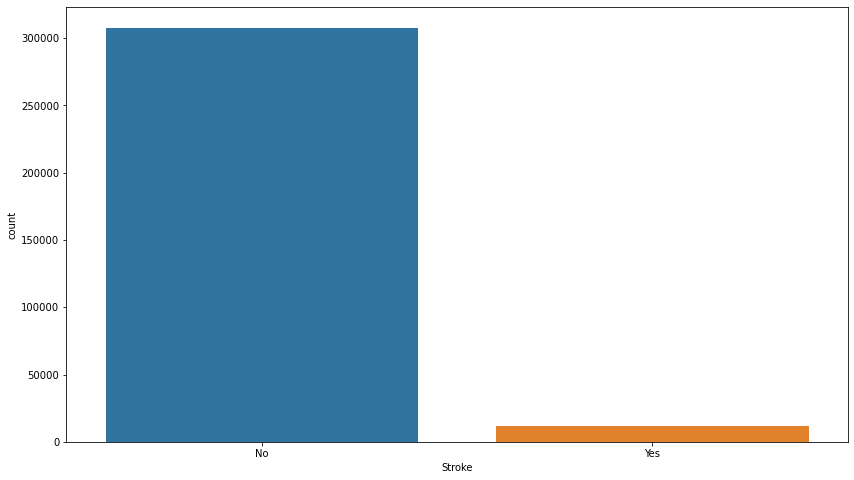

In [ ]:
plot_countplot(df,"Stroke")

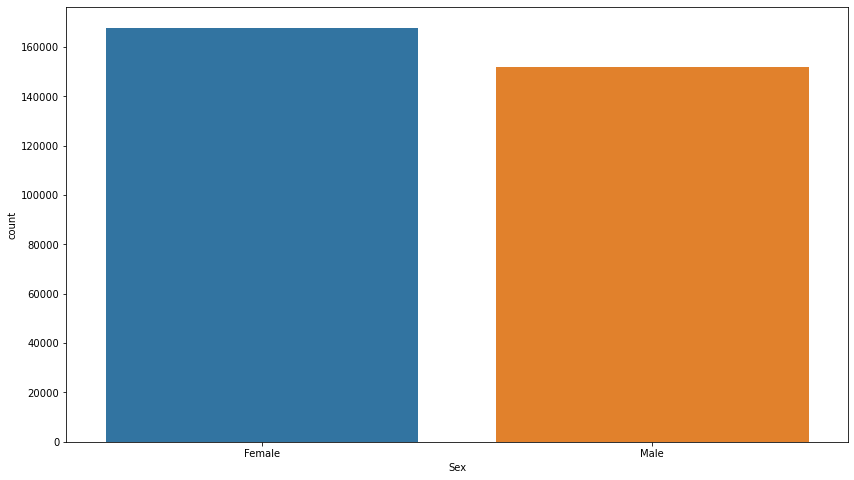

In [ ]:
plot_countplot(df,"Sex")

In [ ]:
df['AgeCategory'].value_counts().sort_index()

21.0    21064
27.0    16955
32.0    18753
37.0    20550
42.0    21006
47.0    21791
52.0    25382
57.0    29757
62.0    33686
67.0    34151
72.0    31065
77.0    21482
80.0    24153
Name: AgeCategory, dtype: int64

In [ ]:
# classification of Age Category by ranges :
Young   = df['AgeCategory'][(df['AgeCategory'] <= 32.0)]
Mature  = df['AgeCategory'][(df['AgeCategory'] >= 37.0) & (df['AgeCategory'] <= 47.0)]
Senior  = df['AgeCategory'][(df['AgeCategory'] >= 52.0) & (df['AgeCategory'] <= 62.0)]
Old     = df['AgeCategory'][(df['AgeCategory'] >= 67.0) & (df['AgeCategory'] <= 77.0)]
Veryold = df['AgeCategory'][(df['AgeCategory'] == 80.0)]

In [ ]:
Age_X = ['Young','Mature','Senior','Old','Veryold']
Age_Y = [len(Young.values),len(Mature.values),len(Senior.values),len(Old.values),len(Veryold.values)]

<AxesSubplot:>

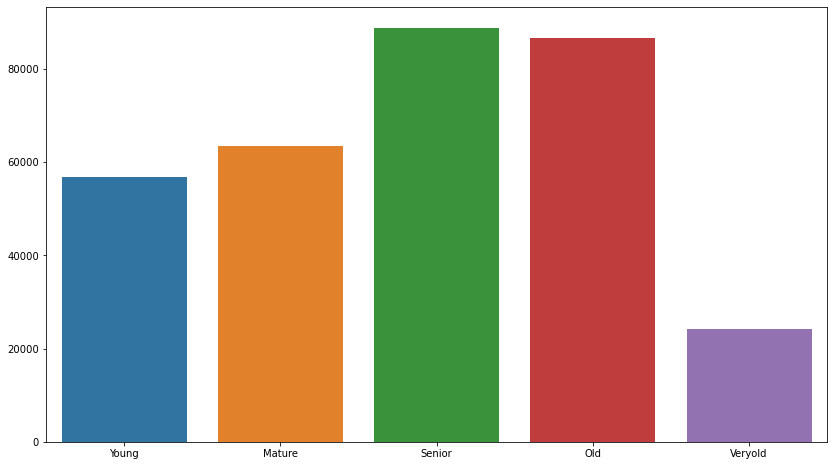

In [ ]:
plt.figure(figsize = (14,8))
sns.barplot (x = Age_X, y = Age_Y)

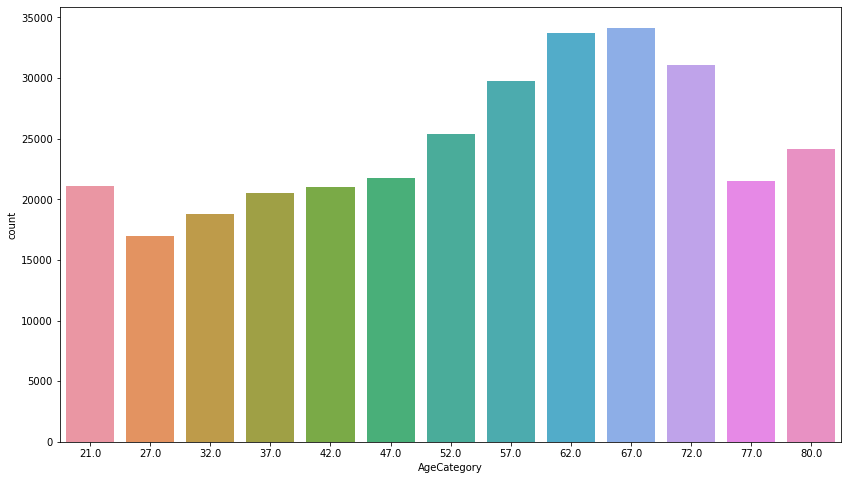

In [ ]:
plot_countplot(df,"AgeCategory")

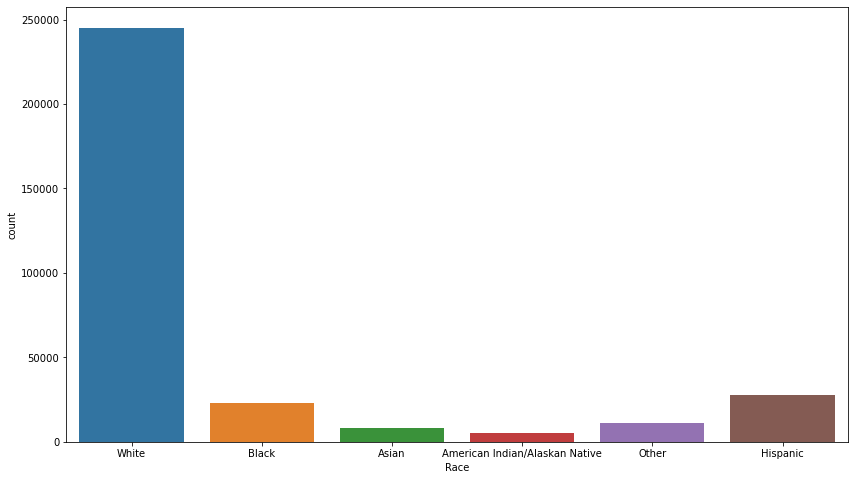

In [ ]:
plot_countplot(df,"Race")

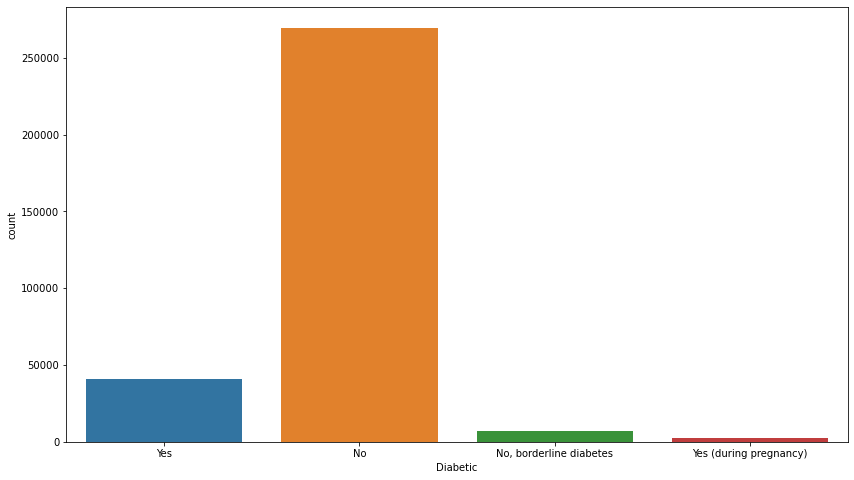

In [ ]:
plot_countplot(df,"Diabetic")

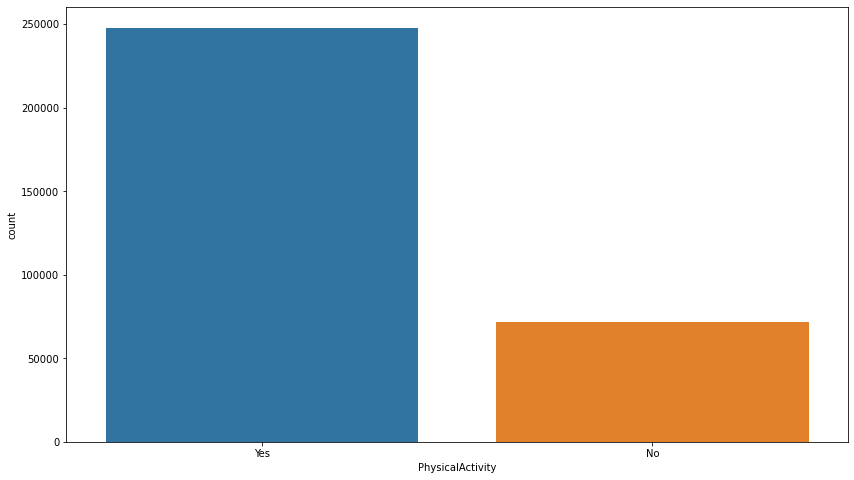

In [ ]:
plot_countplot(df,"PhysicalActivity")

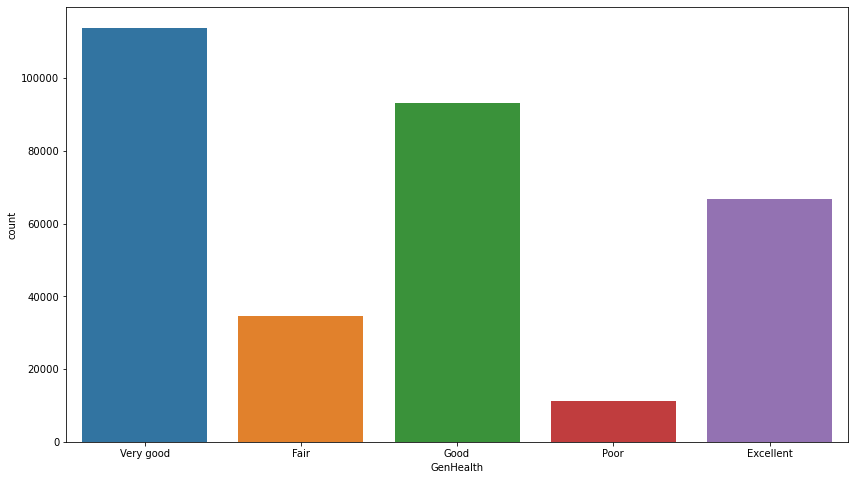

In [ ]:
plot_countplot(df,"GenHealth")

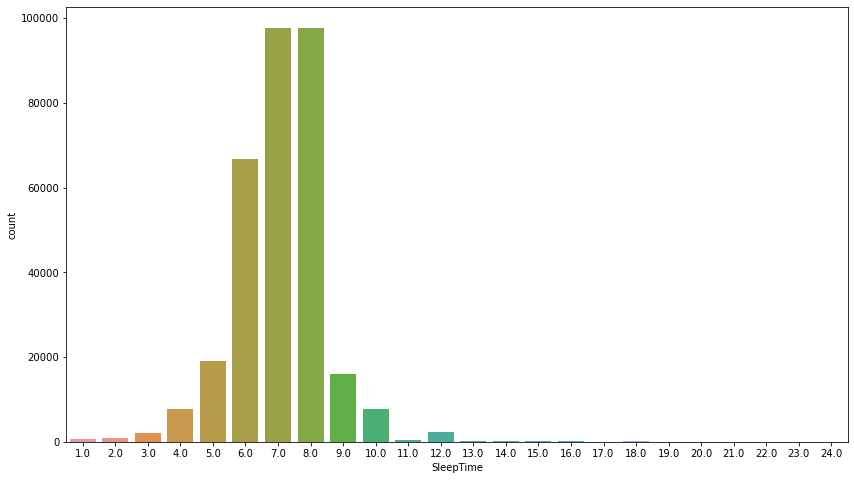

In [ ]:
plot_countplot(df,"SleepTime")

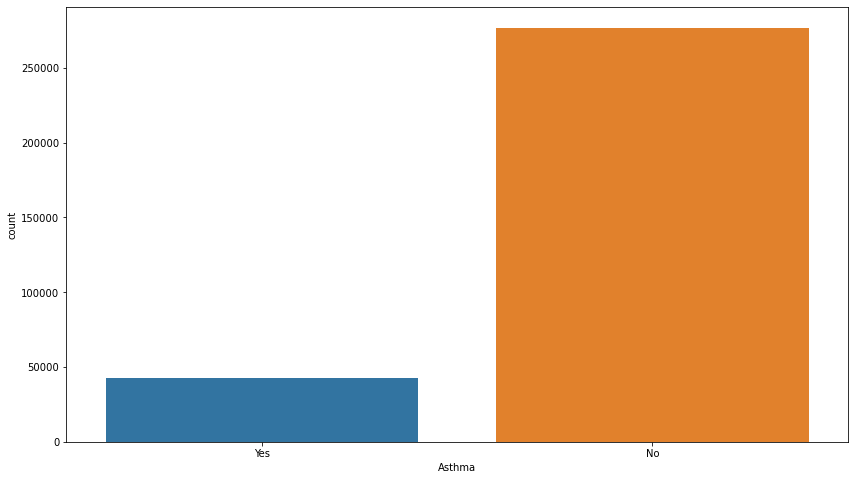

In [ ]:
plot_countplot(df,"Asthma")

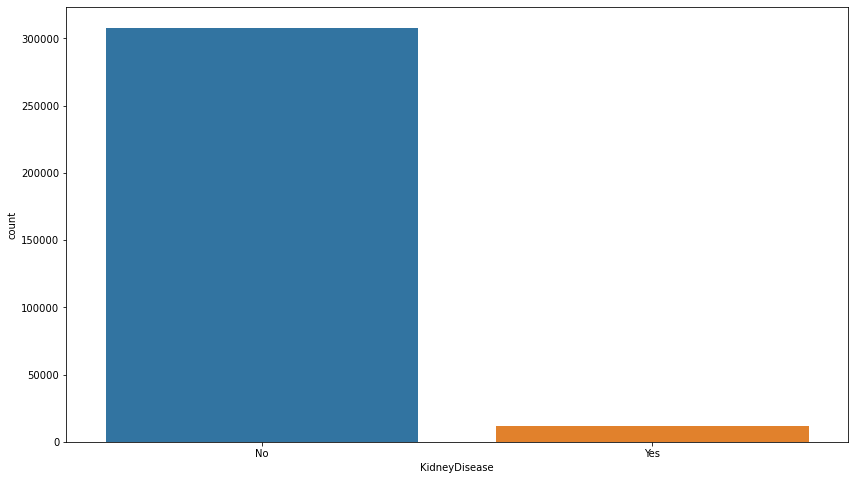

In [ ]:
plot_countplot(df,"KidneyDisease")

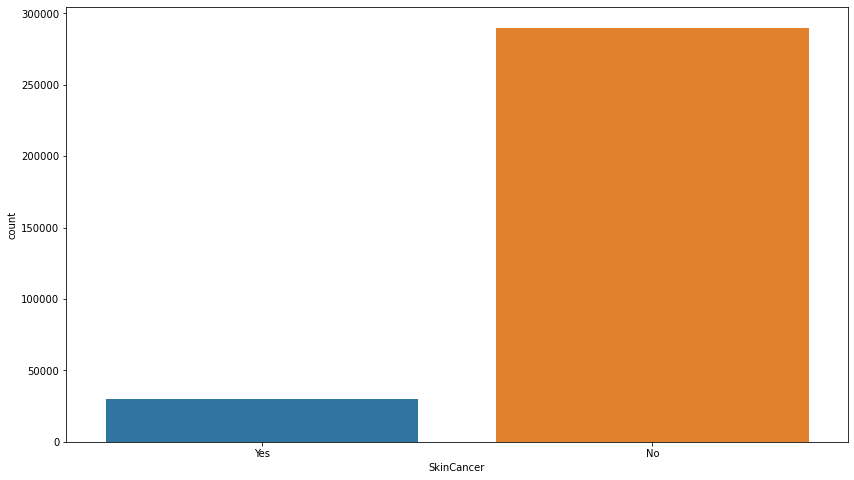

In [ ]:
plot_countplot(df,"SkinCancer")

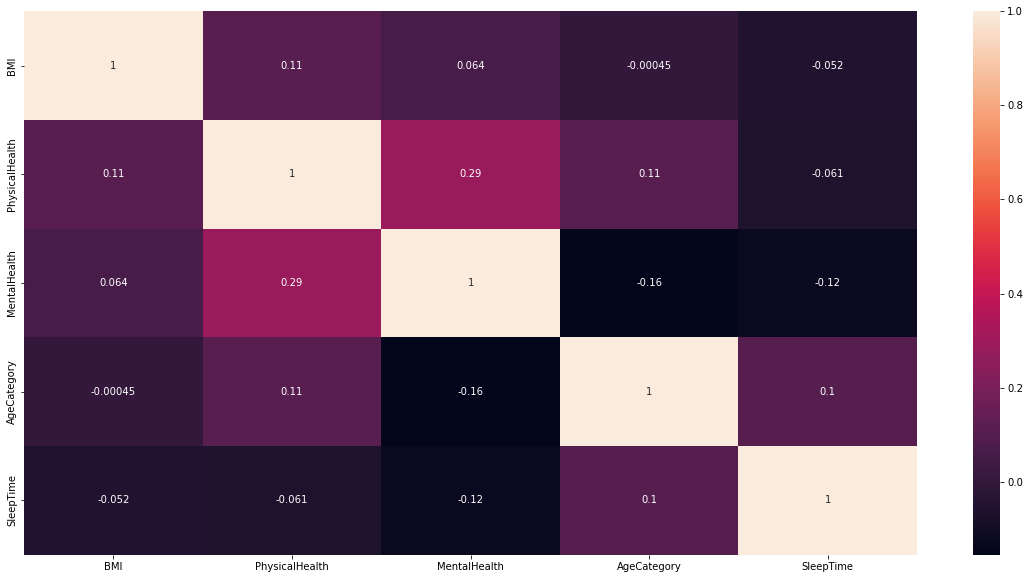

In [ ]:
plt.figure(1,figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
rows = df.to_dict("records")

In [ ]:
rows[0]

{'HeartDisease': 'No',
 'BMI': 16.6,
 'Smoking': 'Yes',
 'AlcoholDrinking': 'No',
 'Stroke': 'No',
 'PhysicalHealth': 3.0,
 'MentalHealth': 30.0,
 'DiffWalking': 'No',
 'Sex': 'Female',
 'AgeCategory': 57.0,
 'Race': 'White',
 'Diabetic': 'Yes',
 'PhysicalActivity': 'Yes',
 'GenHealth': 'Very good',
 'SleepTime': 5.0,
 'Asthma': 'Yes',
 'KidneyDisease': 'No',
 'SkinCancer': 'Yes'}

In [ ]:
d = {'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}
for key, value in rows[1].items():
    print(value)


No
20.34
No
No
Yes
0.0
0.0
No
Female
80.0
White
No
Yes
Very good
7.0
No
No
No


In [ ]:
def dictionary(df,i):
    rows = df.to_dict("records")
    d = {'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}
    for key, value in rows[i].items():
        print(value)
        #return value


In [ ]:
dictionary(df,2)

No
26.58
Yes
No
No
20.0
30.0
No
Male
65-69
White
Yes
Yes
Fair
8.0
Yes
No
No


In [ ]:
def dictionary_with_user_input(df):
    i = int(input("Enter a value for i: "))
    rows = df.to_dict("records")
    d = {'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}
    print(f"Patient number {i} data is :")
    for key, value in rows[i].items():
        print(value)


In [ ]:
dictionary_with_user_input(df)

Enter a value for i: 2
Patient number 2 data is :
No
26.58
Yes
No
No
20.0
30.0
No
Male
65-69
White
Yes
Yes
Fair
8.0
Yes
No
No
